<a href="https://colab.research.google.com/github/smwalter96/map_tweets/blob/main/tweepy_geocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install geopy
!pip install folium
!pip install geopandas

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
import csv
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from random import sample
import numpy as np
from shapely.geometry import Point
import geopandas as gp
import matplotlib.pyplot as plt

In [82]:
# Set tweepy keys and email
consumer_key = "WMDI8EOswG75f2IWE15Aljgfm"
consumer_secret = "7cEiFClzxYNAIgM80crNfkK9VIHyr3IBHErbhJJtx3bnDxr3A8"
access_token = "1161795414267502592-7oAwS0IoQC1Us2HSWDoIG0f5lvDcDW"
access_token_secret = "DcB0iCUqWmOIzS3kH5iQnU2M1XmIDN9MX8r1Q9M7Nntjw"
email = "smwalter96@gmail.com"

In [83]:
# Authorize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [84]:
# Set hashtags to search and date from which to search
tag = "manaus"
date = "2021-01-14"

In [85]:
# Search tweets with a given hashtag
# Return user location
df = pd.DataFrame()
for tweet in tweepy.Cursor(api.search,q=tag,
                           lang="en",
                           since=date, tweet_mode='extended').items(1500):    
    #print (tweet.user.location)
    df = df.append({'user_location': tweet.user.location, 'text': str(tweet.full_text.lower().encode('ascii',errors='ignore'))},ignore_index=True)
    

In [86]:
df

,text,user_location
0,"b""rt @tomphillipsin: the situation in manaus is extremely serious judging by state governor's comments today: there has been significant inc""",she/her
1,"b""rt @bollemdb: in manaus, the brazilian city located within the world's largest rainforest, patients are dying due to lack oxygen. health wo""",
2,"b""rt @kthperseus: what's happening in manaus; an extremely important thread. https://t.co/etxi41ry6q""",★ ~ 중 ☆ ★ 黒見大好き 𓍢𓈒 ★ ⊹ֶָ֢
3,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'",
4,"b""rt @bollemdb: in manaus, the brazilian city located within the world's largest rainforest, patients are dying due to lack oxygen. health wo""",
...,...,...
1495,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'","São Paulo, Brasil"
1496,"b'rt @hectorcapucho: bia kicis is a brazilian congresswoman who should be responsible for many deaths due to covid-19 in manaus, as she many'",
1497,"b'this is an unprecedented calamity said jesem orellana, a local epidemiologist from the fiocruz public health research centre. in the coming hours manaus is going to be the protagonist of one of the saddest chapters of the covid-19 epidemic in the world https://t.co/ikldkakcud'",Nikity City
1498,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'",


In [87]:
df1 = df

# Set columns to map
df1 = df[['text', 'user_location']]

# Drop rows with no user location
df1['user_location'].replace('', np.nan, inplace=True)
df1.dropna(inplace=True)
df1

,text,user_location
0,"b""rt @tomphillipsin: the situation in manaus is extremely serious judging by state governor's comments today: there has been significant inc""",she/her
2,"b""rt @kthperseus: what's happening in manaus; an extremely important thread. https://t.co/etxi41ry6q""",★ ~ 중 ☆ ★ 黒見大好き 𓍢𓈒 ★ ⊹ֶָ֢
5,"b""rt @bollemdb: in manaus, the brazilian city located within the world's largest rainforest, patients are dying due to lack oxygen. health wo""","Belo Horizonte, Brasil"
6,b'rt @barbaragancia: to whom it may concern: brazilian city of manaus is in desperate need of oxygen and medical supplies. we need your help!',Porto Alegre RS
7,"b""rt @kthperseus: what's happening in manaus; an extremely important thread. https://t.co/etxi41ry6q""",#태꾹 : 𝖺𝗇𝖽 𝗂'𝗅𝗅 𝗁𝗈𝗅𝖽 \n𝖺 𝗉𝗂𝖾𝖼𝖾 𝗈𝖿 𝗒𝗈𝗎𝗋𝗌.
...,...,...
1493,"b'rt @belatear: manaus, a city in the north of brazil is going through a lack of oxygen in many health care units causing the death or aggrav'",osamu dazai 💍
1494,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'","Baltimore, MD"
1495,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'","São Paulo, Brasil"
1497,"b'this is an unprecedented calamity said jesem orellana, a local epidemiologist from the fiocruz public health research centre. in the coming hours manaus is going to be the protagonist of one of the saddest chapters of the covid-19 epidemic in the world https://t.co/ikldkakcud'",Nikity City


In [88]:
df1 = df1.loc[np.random.choice(df1.index, size=1000)]
df1

,text,user_location
807,"b""rt @kthperseus: what's happening in manaus; an extremely important thread. https://t.co/etxi41ry6q""",27/05 • 03/12
647,b'rt @oycar: both icu admissions and deaths in the second wave of the #covid19 pandemic in #manaus are now reported at higher levels than see',"Warszawa, Polska"
1272,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Massachusetts, USA"
1272,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Massachusetts, USA"
1466,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Scotland, United Kingdom"
...,...,...
629,"b'@johnnyc79349078 @_hoeman this is tragic but the title is somewhat misleading. it remains highly unclear what % of the population in manaus got infected during the 1st wave (as discussed in the article). given the crowded conditions, the % of the pop required to have immunity to #sarscov2 is very high.'",Soon surrounded by wildlife
1274,"b""covid eruption in brazil's largest state leaves health workers begging for help https://t.co/yqv9uztfv2""",Brasil
343,"b'rt @bollemdb: there is no more oxygen in the city of manaus, at the heart of the amazon. hospitals have collapsed and have completely run o'",Em algum lugar de Aracaju/SE
596,"b'rt @tomphillipsin: it is a catastrophe, and the coming hours will be the worst you can possibly imagine. https://t.co/1g5sooq5px'","Pernambuco, Brasil"


In [89]:
# Set geolocator from geopy
geolocator = Nominatim(timeout=10, user_agent = email)

In [90]:
# Apply geocoder with ratelimit
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# Run geocoder on dataframe and return latitude and longitude
df1['location'] = df1['user_location'].apply(geocode)
df1['Lat'] = df1['location'].apply(lambda x: x.latitude if x else None)
df1['Lon'] = df1['location'].apply(lambda x: x.longitude if x else None)

df1.dropna(inplace=True)
df1.head()

,text,user_location,location,Lat,Lon
807,"b""rt @kthperseus: what's happening in manaus; an extremely important thread. https://t.co/etxi41ry6q""",27/05 • 03/12,"(03.12, Süd-Ring, Forschungszentrum Jülich, Daubenrath, Jülich, Kreis Düren, Nordrhein-Westfalen, 52428, Deutschland, (50.90334245, 6.408393699999995))",50.903342,6.408394
647,b'rt @oycar: both icu admissions and deaths in the second wave of the #covid19 pandemic in #manaus are now reported at higher levels than see',"Warszawa, Polska","(Warszawa, województwo mazowieckie, Polska, (52.2319581, 21.0067249))",52.231958,21.006725
1272,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Massachusetts, USA","(Massachusetts, United States, (42.3788774, -72.032366))",42.378877,-72.032366
1272,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Massachusetts, USA","(Massachusetts, United States, (42.3788774, -72.032366))",42.378877,-72.032366
1466,b'rt @devisridhar: new science article w/@dgurdasani1. you might have wondered what would happen if we just let the virus go &amp; lifted all res',"Scotland, United Kingdom","(Scotland, United Kingdom, (56.7861112, -4.1140518))",56.786111,-4.114052


In [111]:
# Export data as csv
from google.colab import files
df.to_csv('Manaus_1_14_21.csv') 
files.download('Manaus_1_14_21.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'User locations using hashtag manaus on 2021-01-14')

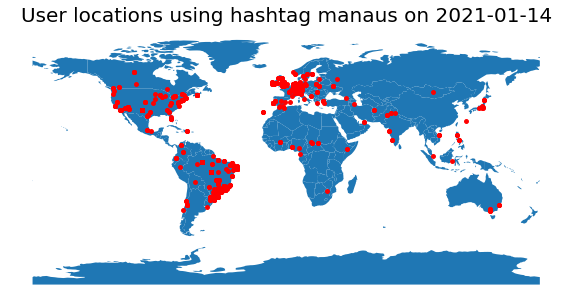

In [92]:
# Map user location
geometry = [Point(xy) for xy in zip(df1['Lon'], df1['Lat'])]
gdf = gp.GeoDataFrame(df1, geometry=geometry)   

title_text = ('User Locations using Hashtag ' + tag)

plt.show()
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
title = ('User locations using hashtag ' + tag + ' on ' + date)
plt.axis('off')
plt.title(title, fontsize=20)

In [93]:
# Plot interactive user locations with tweet text in popups
pd.set_option('display.max_colwidth', -1)
print()

map1 = folium.Map()
for index,row in df1.iterrows(): 
  iframe = folium.IFrame(html=row['text'], width=500, height=300)
  popup = folium.Popup(iframe, max_width=2650)
  folium.Marker(location=(row['Lat'],row['Lon']), popup=popup).add_to(map1)

display(map1)